# Australian Credit Approval Statlog

Applying algorithms in R for given dataset.

Importing data and assigning it to myData variable.

In [1]:
library(rpart)
library(rpart.plot)
library(e1071)
library(caret)
library(BalancedSampling)

myData <- read.csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat", header=FALSE, sep=" ")

Loading required package: lattice
Loading required package: ggplot2


In [2]:
head(myData)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1


## Data Adjusments

Adjusting dataset for categorical variables. Here R's factor function is used in order to tell R kernel that given certain columns should be treated as categorical features.

In [3]:
myData$V1 <- factor(myData$V1)
myData$V4 <- factor(myData$V4)
myData$V5 <- factor(myData$V5)
myData$V6 <- factor(myData$V6)
myData$V8 <- factor(myData$V8)
myData$V9 <- factor(myData$V9)
myData$V11 <- factor(myData$V11)
myData$V12 <- factor(myData$V12)
myData$V15 <- factor(myData$V15)

In [4]:
head(myData)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1


After factorization, one should split their dataset to train and split parts. Here it is set as %75 train and %25 test according to their sizes.

In [5]:
n <- nrow(myData)
test <- sample(1:n, n*0.25)
train <- -test

# Logistic Regression 

Logistic Regression Applications. Lets begin with taking a look to our train and test splits that we are going to use for logistic regression.

In [6]:
head(myData[train,])
head(myData[test,])

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
1,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
2,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
3,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
5,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
6,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
7,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
537,1,33.75,2.750,2,3,5,0.000,0,0,0,0,2,180,1,0
136,0,38.33,4.415,2,8,4,0.125,0,0,0,0,2,160,1,0
671,0,37.75,5.500,2,11,4,0.125,1,0,0,1,2,228,1,1
659,0,17.67,0.000,1,5,1,0.000,0,0,0,0,2,86,1,0
613,1,26.17,0.250,2,3,5,0.000,1,0,0,1,2,0,1,1
385,0,41.17,6.500,2,11,4,0.500,1,1,3,1,2,145,1,1


In this section, we are creating a generalized linear model. After that, we are classifying our predictions for a certain probability value (setted as 0.7 in this example), then creating a confusion matrix in order to test model's accuracy.

#### Testing for approved credit applications for numerical features.

In [7]:
model <- glm(V15 ~ V2 + V3 + V7 + V10 + V13 + V14, data=myData[train,], binomial)
oddsratio <- exp(predict(model,myData[test,]))
predicted <- ifelse(oddsratio > 0.75,1,0)
confusionMatrix(table(predicted,real=myData[test,15]))

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Confusion Matrix and Statistics

         real
predicted  0  1
        0 83 27
        1 15 47
                                         
               Accuracy : 0.7558         
                 95% CI : (0.6846, 0.818)
    No Information Rate : 0.5698         
    P-Value [Acc > NIR] : 2.887e-07      
                                         
                  Kappa : 0.4918         
 Mcnemar's Test P-Value : 0.08963        
                                         
            Sensitivity : 0.8469         
            Specificity : 0.6351         
         Pos Pred Value : 0.7545         
         Neg Pred Value : 0.7581         
             Prevalence : 0.5698         
         Detection Rate : 0.4826         
   Detection Prevalence : 0.6395         
      Balanced Accuracy : 0.7410         
                                         
       'Positive' Class : 0              
                                         

Statlog data set shows us that numerical columns give an accuracy between %75 and %80. In order to determine signifiance of given features, let's take a look at anova and summary values.

In [8]:
anova(model)
summary(model)

,Df,Deviance,Resid. Df,Resid. Dev
NULL,NA,NA,517,712.8716
V2,1,16.447507965,516,696.4241
V3,1,13.945282898,515,682.4788
V7,1,46.769040176,514,635.7098
V10,1,94.133793729,513,541.5760
V13,1,0.005326222,512,541.5706
V14,1,32.304871721,511,509.2658



Call:
glm(formula = V15 ~ V2 + V3 + V7 + V10 + V13 + V14, family = binomial, 
    data = myData[train, ])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2209  -0.7414  -0.6253   0.7374   1.8930  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.6214593  0.3627757  -4.470 7.84e-06 ***
V2           0.0029413  0.0102428   0.287 0.773993    
V3           0.0246464  0.0228809   1.077 0.281408    
V7           0.2365017  0.0493494   4.792 1.65e-06 ***
V10          0.3121393  0.0489821   6.373 1.86e-10 ***
V13         -0.0003077  0.0006639  -0.463 0.643026    
V14          0.0004866  0.0001350   3.604 0.000314 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 712.87  on 517  degrees of freedom
Residual deviance: 509.27  on 511  degrees of freedom
AIC: 523.27

Number of Fisher Scoring iterations: 7


#### Now let's apply logistic regression on all data.

In [9]:
n <- nrow(myData)
test <- sample(1:n, n*0.25)
train <- -test
model <- glm(V15 ~ . , data=myData[train,], binomial)
oddsratio <- exp(predict(model,myData[test,]))
predicted <- ifelse(oddsratio > 0.7,1,0)
confusionMatrix(table(predicted,real=myData[test,15]))

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Confusion Matrix and Statistics

         real
predicted  0  1
        0 76 16
        1 16 64
                                          
               Accuracy : 0.814           
                 95% CI : (0.7476, 0.8691)
    No Information Rate : 0.5349          
    P-Value [Acc > NIR] : 1.689e-14       
                                          
                  Kappa : 0.6261          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8261          
            Specificity : 0.8000          
         Pos Pred Value : 0.8261          
         Neg Pred Value : 0.8000          
             Prevalence : 0.5349          
         Detection Rate : 0.4419          
   Detection Prevalence : 0.5349          
      Balanced Accuracy : 0.8130          
                                          
       'Positive' Class : 0               
                                          

In [10]:
summary(model)


Call:
glm(formula = V15 ~ ., family = binomial, data = myData[train, 
    ])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6139  -0.2706  -0.0849   0.2870   3.3813  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.065e+00  1.279e+00  -5.523 3.33e-08 ***
V11         -1.414e-01  3.854e-01  -0.367 0.713772    
V2           2.314e-02  1.669e-02   1.387 0.165570    
V3          -3.580e-02  3.509e-02  -1.020 0.307598    
V42          1.484e+00  4.616e-01   3.215 0.001302 ** 
V43          3.249e+01  2.230e+03   0.015 0.988375    
V52         -9.139e+00  1.275e+03  -0.007 0.994282    
V53         -9.662e+00  1.275e+03  -0.008 0.993954    
V54         -9.929e+00  1.275e+03  -0.008 0.993788    
V55          2.328e+00  7.674e+00   0.303 0.761616    
V56         -9.878e+00  1.275e+03  -0.008 0.993820    
V57         -1.014e+01  1.275e+03  -0.008 0.993654    
V58         -8.864e+00  1.275e+03  -0.007 0.994454    
V59         -9.235e+00 

# Statistical Analysis and Data Reconfiguration

## Data adjustments for 5th column because it created some problems about splitting dataset to train and test

In [11]:
distance <- dist(myData[,c("V2","V3","V7","V10","V13","V14")])
cluster <- hclust(distance)
#plot(cluster, label= myData$v15)
sd <- split(myData$V5,cutree(cluster, 4))

In [12]:
for(i in 1:4) {
    print(table(sd[i]))
}


  1   2   3   4   5   6   7   8   9  10  11  12  13  14 
 52  30  59  51  10  54  37 144  64  23  77   2  40  38 

 1  2  3  4  5  6  7  8  9 10 11 12 13 14 
 0  0  0  0  0  0  1  2  0  1  1  1  0  0 

 1  2  3  4  5  6  7  8  9 10 11 12 13 14 
 0  0  0  0  0  0  0  0  0  1  0  0  1  0 

 1  2  3  4  5  6  7  8  9 10 11 12 13 14 
 1  0  0  0  0  0  0  0  0  0  0  0  0  0 


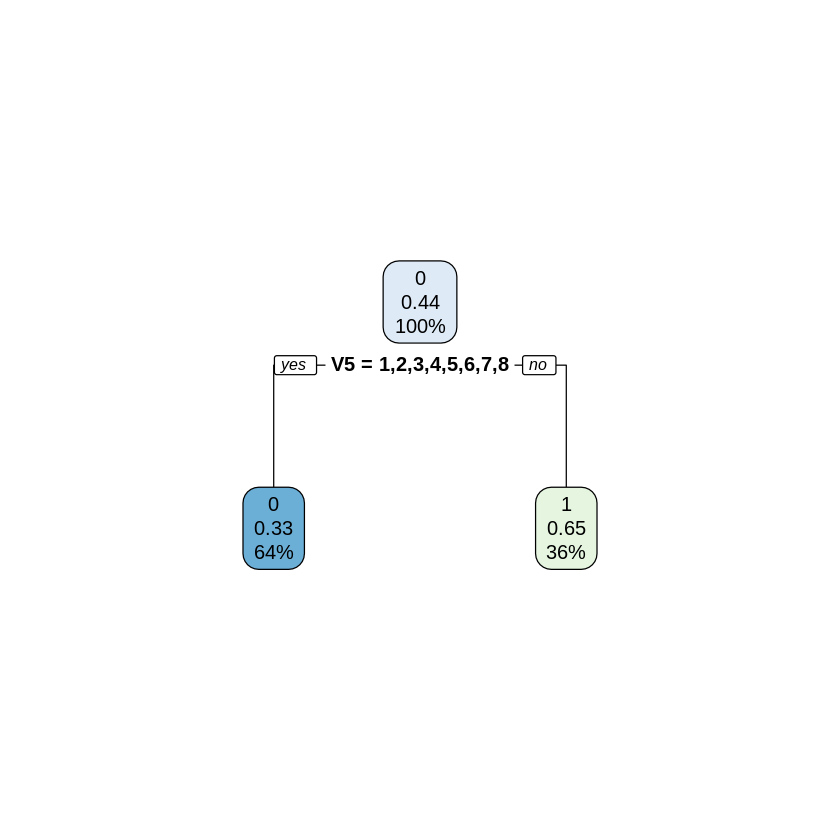

In [13]:
treeModel.model <- rpart(V15 ~ V5, data=myData, method='class')
rpart.plot(treeModel.model)

In [21]:
?cube